# ANALISIS FAKTOR YANG MEMPENGARUHI WORK LIFE BALANCE: DATASET Impact_of_Remote_Work_on_Mental_Health
Oleh :
1. Bunga Aprilian (23083010003)
2. Amelia Zafira Karnaen (23083010019)

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = pd.read_csv( "/content/Impact_of_Remote_Work_on_Mental_Health.csv" )

In [12]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [13]:
data.shape

(5000, 20)

In [14]:
data.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [15]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [16]:
print(data.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [17]:
# Mengisi Missing Values untuk Kolom Kategori dengan Modus
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Burnout,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


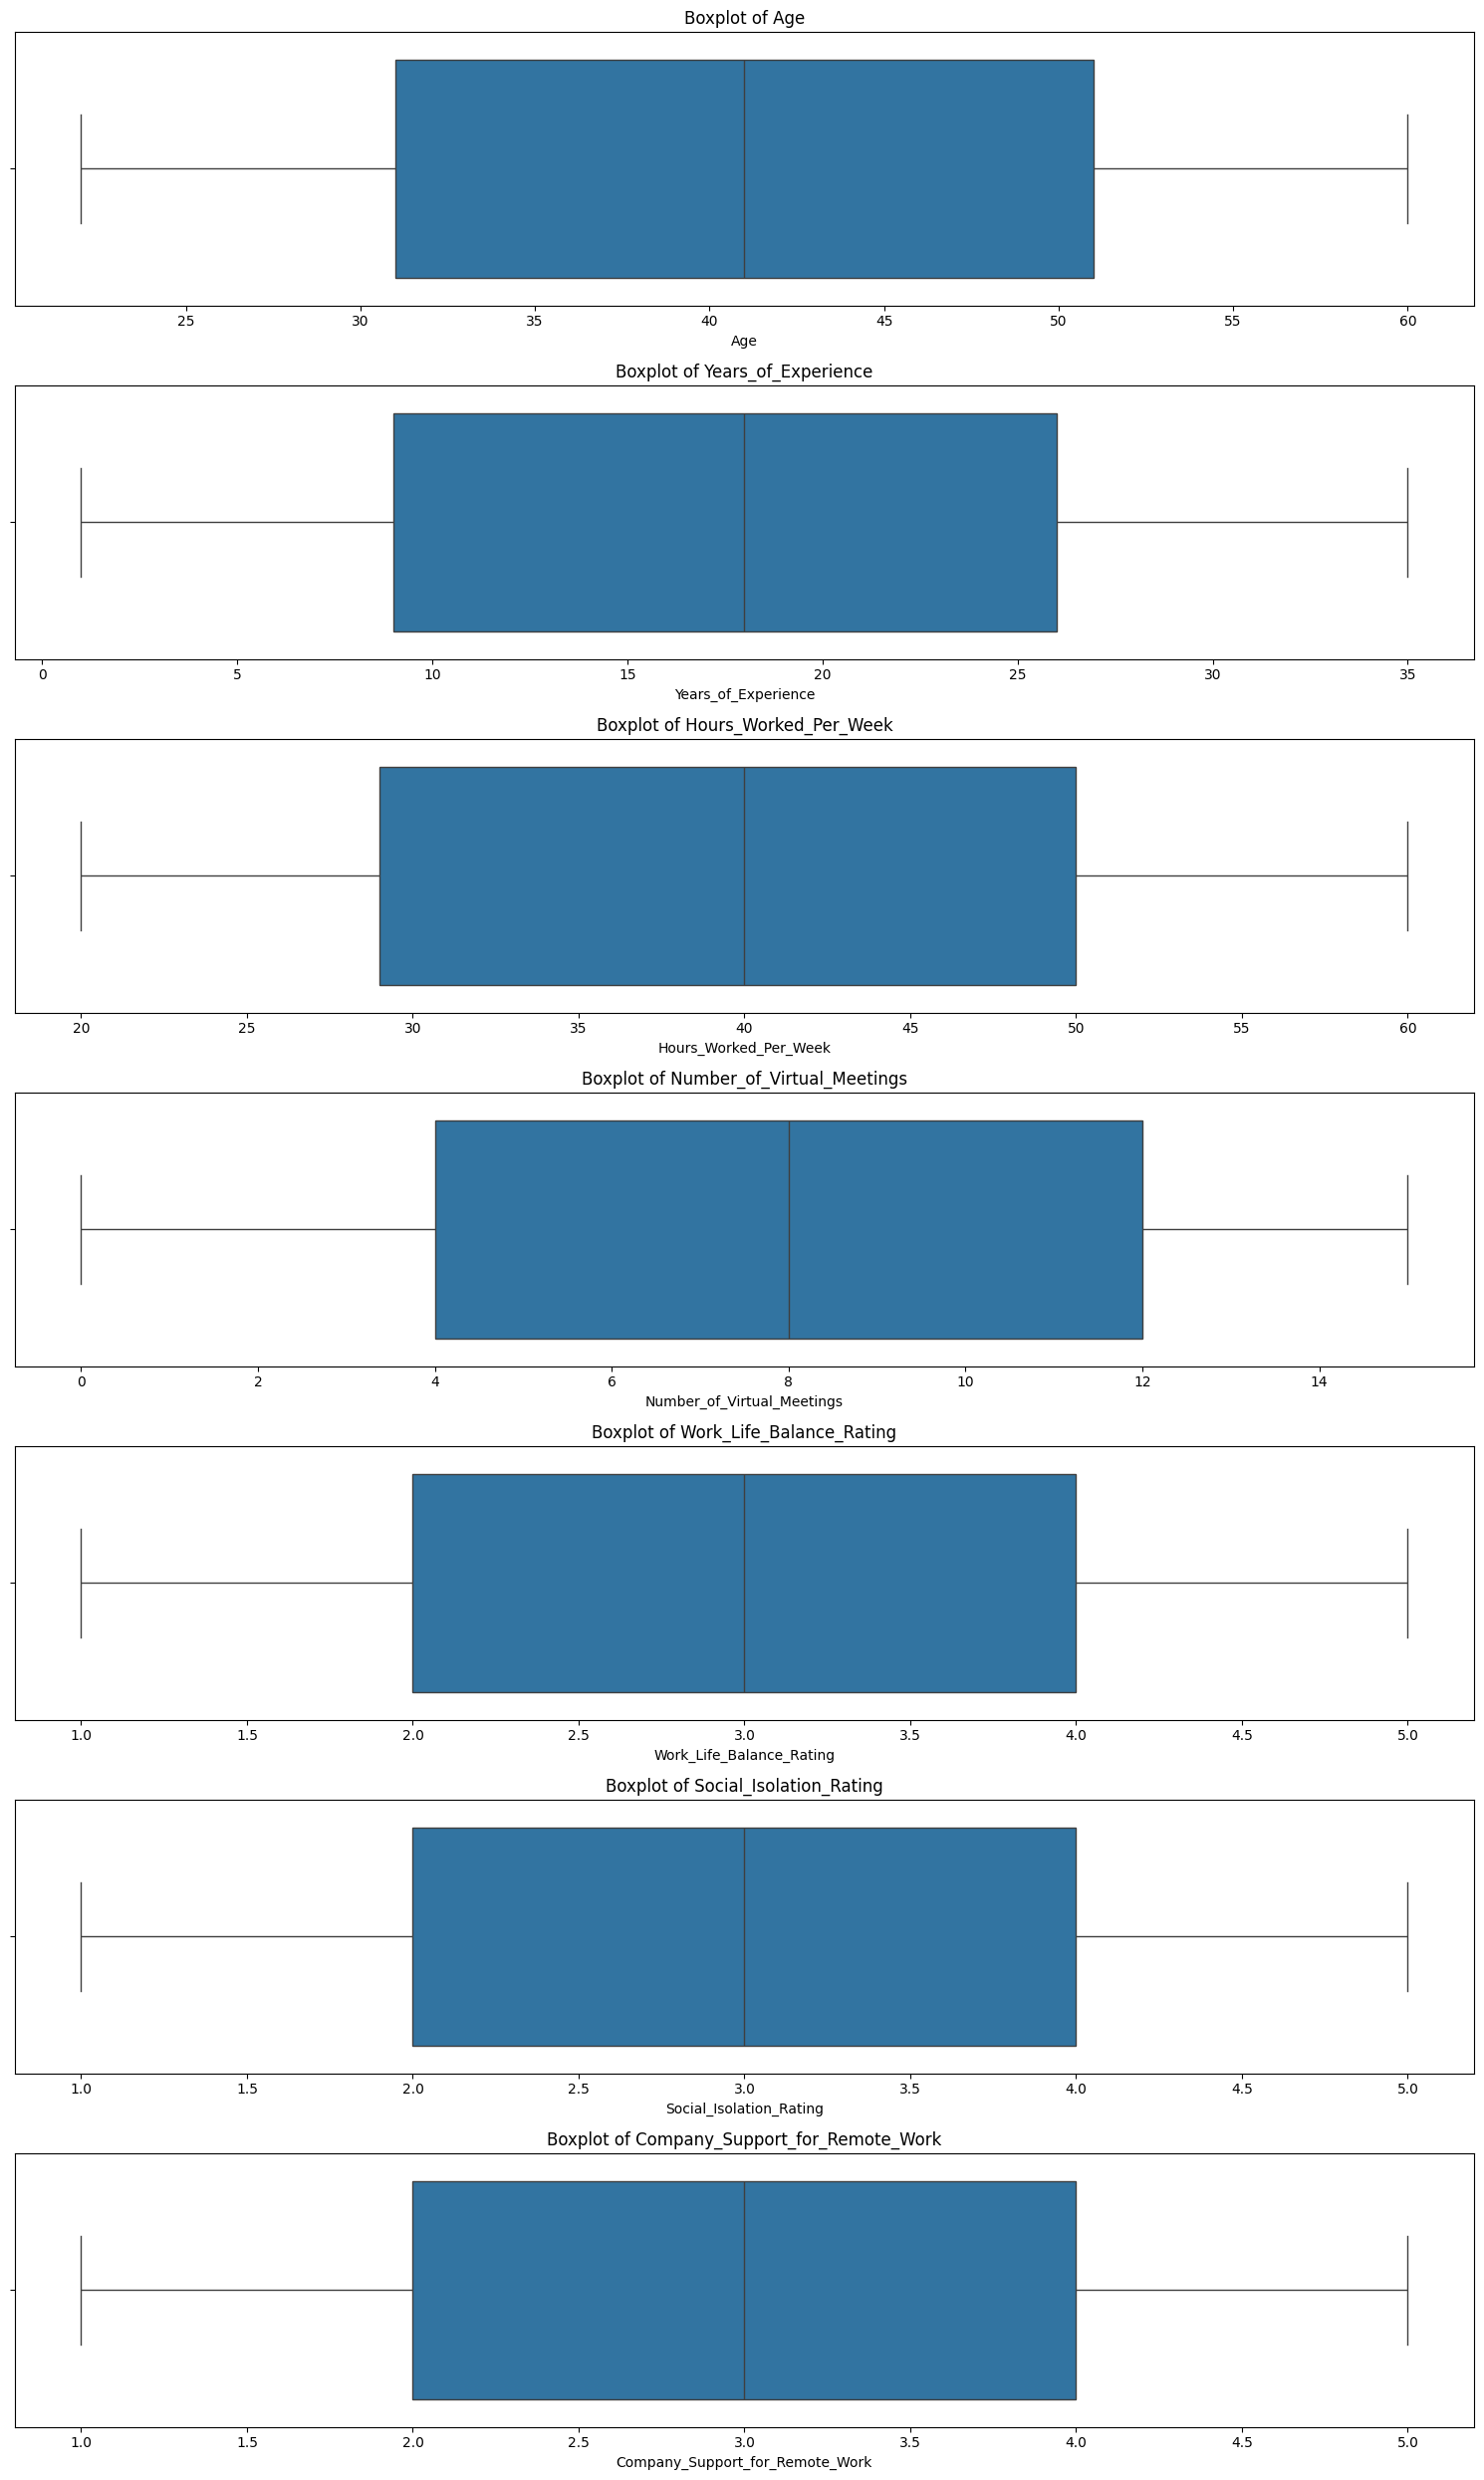

In [18]:
# Daftar variabel numerik yang akan diperiksa untuk outlier
variables = [
    'Age',
    'Years_of_Experience',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Social_Isolation_Rating',
    'Company_Support_for_Remote_Work'
]

# Menghasilkan boxplot untuk setiap variabel untuk mendeteksi outlier
plt.figure(figsize=(15, 25))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    sns.boxplot(x=data[var])
    plt.title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()

1. Boxplot pertama menunjukkan distribusi umur responden, yang berkisar antara sekitar 25 hingga 60 tahun. Mayoritas responden berada di rentang usia 30 hingga 50 tahun, dengan nilai tengah atau median di sekitar usia 40 tahun. Tidak ada outlier yang terlihat pada variabel ini, menunjukkan bahwa distribusi umur responden cukup merata dalam rentang tersebut.

2. Boxplot kedua menunjukkan distribusi pengalaman kerja (Years_of_Experience), yang berkisar dari 0 hingga sekitar 35 tahun. Sebagian besar responden memiliki pengalaman antara 5 hingga 20 tahun, dengan median di sekitar 15 tahun. Tidak ada outlier yang terlihat, sehingga distribusi pengalaman kerja juga tampak merata.

3. Boxplot ketiga memperlihatkan distribusi jumlah jam kerja per minggu (Hours_Worked_Per_Week), yang berkisar dari sekitar 25 hingga 50 jam. Sebagian besar responden bekerja antara 30 hingga 45 jam per minggu, dengan median di sekitar 40 jam. Tidak ada outlier yang signifikan dalam variabel ini, menunjukkan bahwa jam kerja responden relatif seragam.

4. Boxplot keempat menunjukkan jumlah pertemuan virtual per minggu (Number_of_Virtual_Meetings), yang berkisar dari 0 hingga sekitar 24 pertemuan. Mayoritas responden mengadakan pertemuan antara 4 hingga 12 kali per minggu, dengan median di sekitar 8 pertemuan. Distribusi jumlah pertemuan virtual ini juga tidak menunjukkan adanya outlier.

5. Boxplot kelima menggambarkan rating keseimbangan hidup dan pekerjaan (Work_Life_Balance_Rating) dengan rentang nilai dari 1 hingga 5. Sebagian besar responden memberikan rating antara 2 dan 4, dengan median di sekitar 3. Variabel ini menunjukkan distribusi yang cukup merata tanpa adanya outlier.

6. Boxplot keenam menunjukkan rating isolasi sosial (Social_Isolation_Rating), yang berkisar dari 1 hingga 5. Sebagian besar responden memberikan rating antara 2 hingga 4, dengan median sekitar 3. Distribusi data untuk variabel ini juga tampak merata tanpa adanya outlier.

7. Boxplot terakhir memperlihatkan rating dukungan perusahaan untuk kerja jarak jauh (Company_Support_for_Remote_Work), yang berkisar dari 1 hingga 5. Sebagian besar responden menilai dukungan perusahaan antara 2 hingga 4, dengan median di sekitar 3. Tidak ada outlier yang terlihat pada variabel ini, sehingga distribusi data untuk dukungan perusahaan juga terdistribusi merata.

In [19]:
# Memilih kolom/ variabel yang akan digunakan
selected_columns = [
    'Work_Life_Balance_Rating', 'Stress_Level', 'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings', 'Job_Role', 'Company_Support_for_Remote_Work',
    'Satisfaction_with_Remote_Work', 'Sleep_Quality', 'Access_to_Mental_Health_Resources',
    'Social_Isolation_Rating'
]
df_selected = data[selected_columns]

In [20]:
# Konversi variabel kategorik ke numerik
df_selected['Stress_Level'] = df_selected['Stress_Level'].astype('category').cat.codes
df_selected['Job_Role'] = df_selected['Job_Role'].astype('category').cat.codes
df_selected['Satisfaction_with_Remote_Work'] = df_selected['Satisfaction_with_Remote_Work'].astype('category').cat.codes
df_selected['Sleep_Quality'] = df_selected['Sleep_Quality'].astype('category').cat.codes
df_selected['Access_to_Mental_Health_Resources'] = df_selected['Access_to_Mental_Health_Resources'].astype('category').cat.codes

<ipython-input-20-ae5da20ffe9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Stress_Level'] = df_selected['Stress_Level'].astype('category').cat.codes
<ipython-input-20-ae5da20ffe9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Job_Role'] = df_selected['Job_Role'].astype('category').cat.codes
<ipython-input-20-ae5da20ffe9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [21]:
# Korelasi untuk setiap variabel
correlation_matrix = df_selected.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)


Matriks Korelasi:
                                    Work_Life_Balance_Rating  Stress_Level  \
Work_Life_Balance_Rating                           1.000000     -0.029823   
Stress_Level                                      -0.029823      1.000000   
Hours_Worked_Per_Week                              0.000820     -0.008761   
Number_of_Virtual_Meetings                         0.007285      0.005820   
Job_Role                                           0.013590      0.017520   
Company_Support_for_Remote_Work                   -0.012913     -0.001722   
Satisfaction_with_Remote_Work                      0.025991      0.018294   
Sleep_Quality                                      0.009217      0.000658   
Access_to_Mental_Health_Resources                  0.007847     -0.028173   
Social_Isolation_Rating                           -0.004626     -0.018228   

                                   Hours_Worked_Per_Week  \
Work_Life_Balance_Rating                        0.000820   
Stress_Level

Matriks korelasi ini menunjukkan hubungan antar variabel seperti *Work_Life_Balance_Rating*, *Stress_Level*, dan *Hours_Worked_Per_Week*. Korelasi berkisar antara -1 hingga 1, dengan nilai mendekati 1 menunjukkan korelasi positif yang kuat, sedangkan mendekati -1 menunjukkan korelasi negatif yang kuat. Sebagian besar korelasi di sini sangat lemah, misalnya korelasi antara *Work_Life_Balance_Rating* dan *Stress_Level* sebesar -0.029823, yang berarti hubungan negatif sangat lemah, menunjukkan bahwa peningkatan *Work_Life_Balance* hanya sedikit menurunkan *Stress_Level*. Secara keseluruhan, matriks ini menunjukkan bahwa variabel-variabel tersebut memiliki hubungan yang lemah satu sama lain, sehingga pengaruhnya terhadap satu sama lain tidak terlalu signifikan.

In [22]:
# Regresi Linear untuk melihat faktor-faktor yang mempengaruhi Work_Life_Balance
X = df_selected[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Social_Isolation_Rating',
                 'Stress_Level', 'Job_Role', 'Company_Support_for_Remote_Work',
                 'Satisfaction_with_Remote_Work', 'Sleep_Quality', 'Access_to_Mental_Health_Resources']]
y = df_selected['Work_Life_Balance_Rating']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("\nRingkasan Model Regresi Linear untuk Work_Life_Balance_Rating:\n", model.summary())


Ringkasan Model Regresi Linear untuk Work_Life_Balance_Rating:
                                OLS Regression Results                               
Dep. Variable:     Work_Life_Balance_Rating   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     1.211
Date:                      Fri, 08 Nov 2024   Prob (F-statistic):              0.283
Time:                              05:23:58   Log-Likelihood:                -8808.5
No. Observations:                      5000   AIC:                         1.764e+04
Df Residuals:                          4990   BIC:                         1.770e+04
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0

Model yang memprediksi *Work_Life_Balance_Rating* memiliki *R-squared* sebesar 0.002, yang berarti hanya 0.2% dari variabilitas dalam *Work_Life_Balance_Rating* yang dipengaruhi oleh variabel-variabel independen dalam model ini. Hal ini menunjukkan bahwa model ini sangat lemah dalam menjelaskan hubungan variabel pada *Work_Life_Balance_Rating*.

Di antara variabel-variabel independen, hanya *Stress_Level* yang signifikan secara statistik (p = 0.031) dengan koefisien negatif sebesar -0.0525, menunjukkan bahwa peningkatan tingkat stres sedikit menurunkan *Work_Life_Balance_Rating*. Variabel lainnya tidak signifikan secara statistik (p > 0.05), sehingga tidak memiliki pengaruh yang signifikan pada *Work_Life_Balance_Rating*.

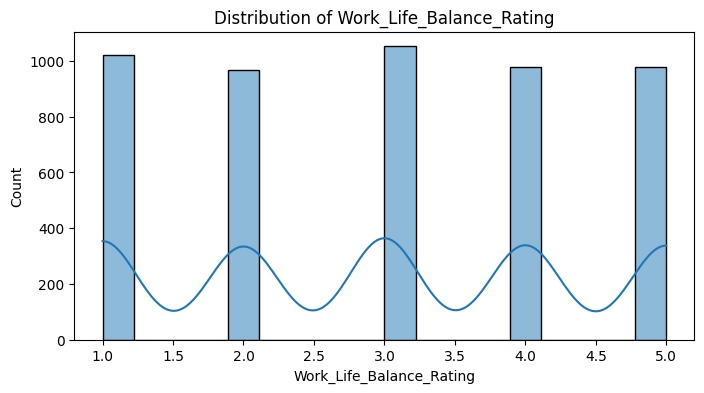

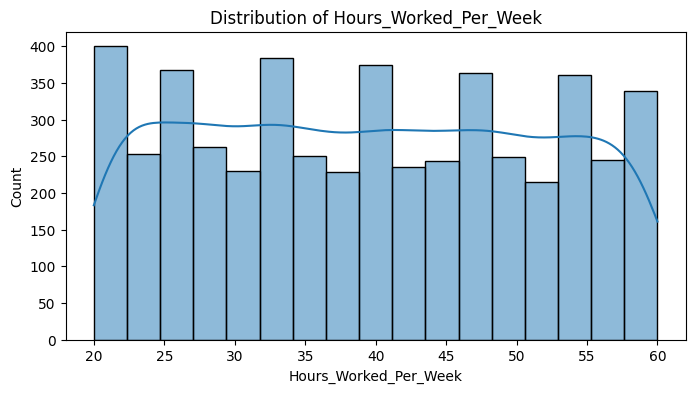

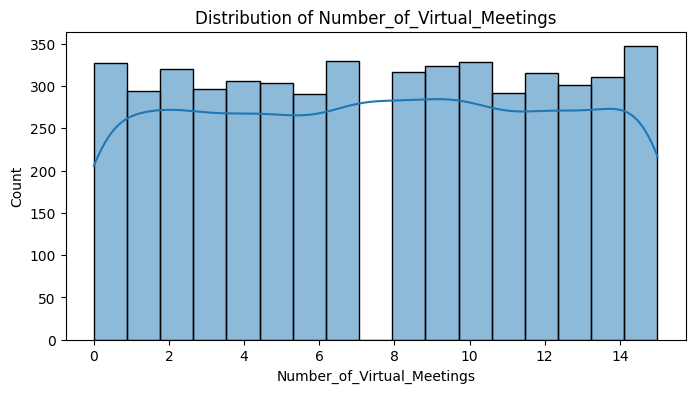

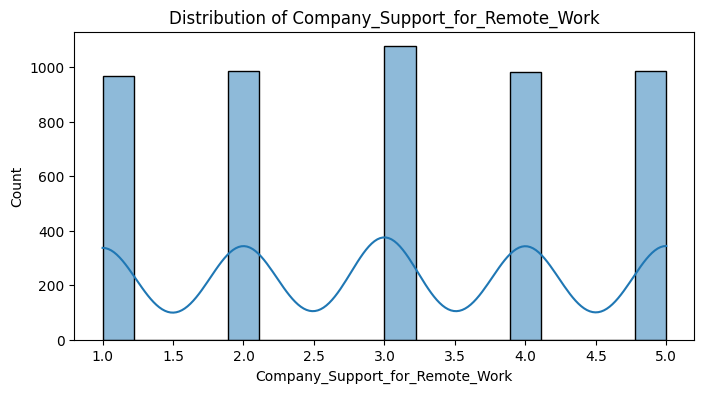

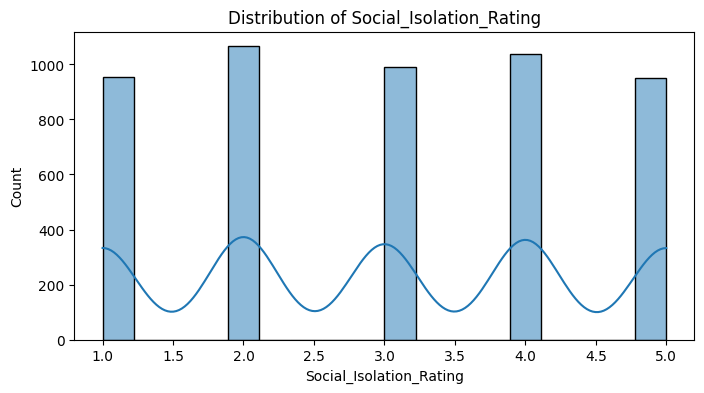

In [23]:
# Distplot untuk setiap variabel numerik
for column in df_selected.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_selected[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()



1. Distribusi work_life_balance: Histogram ini menunjukkan penilaian karyawan terhadap keseimbangan kehidupan-kerja mereka pada skala 1 hingga 5. Tinggi batang terlihat konsisten di seluruh skala, yang mengindikasikan bahwa penilaian karyawan terhadap keseimbangan kehidupan-kerja cukup merata, tanpa konsentrasi kuat pada satu nilai tertentu.

2. Distribusi hours_work_per_week: Histogram ini menggambarkan jumlah jam kerja per minggu. Data terlihat tersebar merata dalam rentang 20 hingga 60 jam, meskipun ada beberapa fluktuasi, dengan puncak pada rentang jam yang lebih rendah dan lebih tinggi. Hal ini menunjukkan adanya dua pola kerja atau kategori karyawan yang

3. Distribusi Number_of_virtual_meetings: Histogram tersebut menunjukkan frekuensi jumlah pertemuan virtual yang diikuti setiap minggu. Dari data tersebut terlihat rata di seluruh rentang dan menunjukkan distribusi yang relatif seragam. Sebagian besar karyawan mengikuti pertemuan virtual dalam kisaran 0 hingga 14 pertemuan per minggu.

4. Distribusi Company_Support_for_Remote_Work dengan rentang nilai yang juga berkisar dari 1 hingga 5. Sama seperti grafik pertama, distribusi jumlah observasi untuk setiap rating hampir merata dengan jumlah observasi sekitar 1000 di setiap tingkat. Ini menunjukkan bahwa persepsi responden terhadap dukungan perusahaan untuk kerja jarak jauh tersebar cukup merata, tanpa ada nilai rating yang lebih banyak dibanding lainnya. Garis melengkung di atas histogram mengikuti pola yang serupa, memperlihatkan variasi stabil di setiap nilai rating, yang menunjukkan bahwa dukungan perusahaan terhadap kerja jarak jauh tidak memiliki perbedaan yang signifikan di antara tingkat rating.

5. Distribusi variabel Social_Isolation_Rating dengan rentang nilai rating dari 1 hingga 5. Distribusi jumlah observasi terlihat hampir merata di setiap tingkat rating, dengan jumlah observasi berkisar di sekitar 1000 untuk masing-masing nilai. Hal ini mengindikasikan bahwa persepsi responden terhadap isolasi sosial tersebar cukup merata, tanpa ada nilai rating tertentu yang mendominasi. Garis melengkung di atas histogram memperlihatkan pola fluktuatif yang stabil, menggambarkan distribusi data yang seragam tanpa adanya puncak signifikan di salah satu nilai. Keseragaman ini menunjukkan bahwa pengalaman isolasi sosial responden tidak memiliki perbedaan mencolok antar tingkat rating.

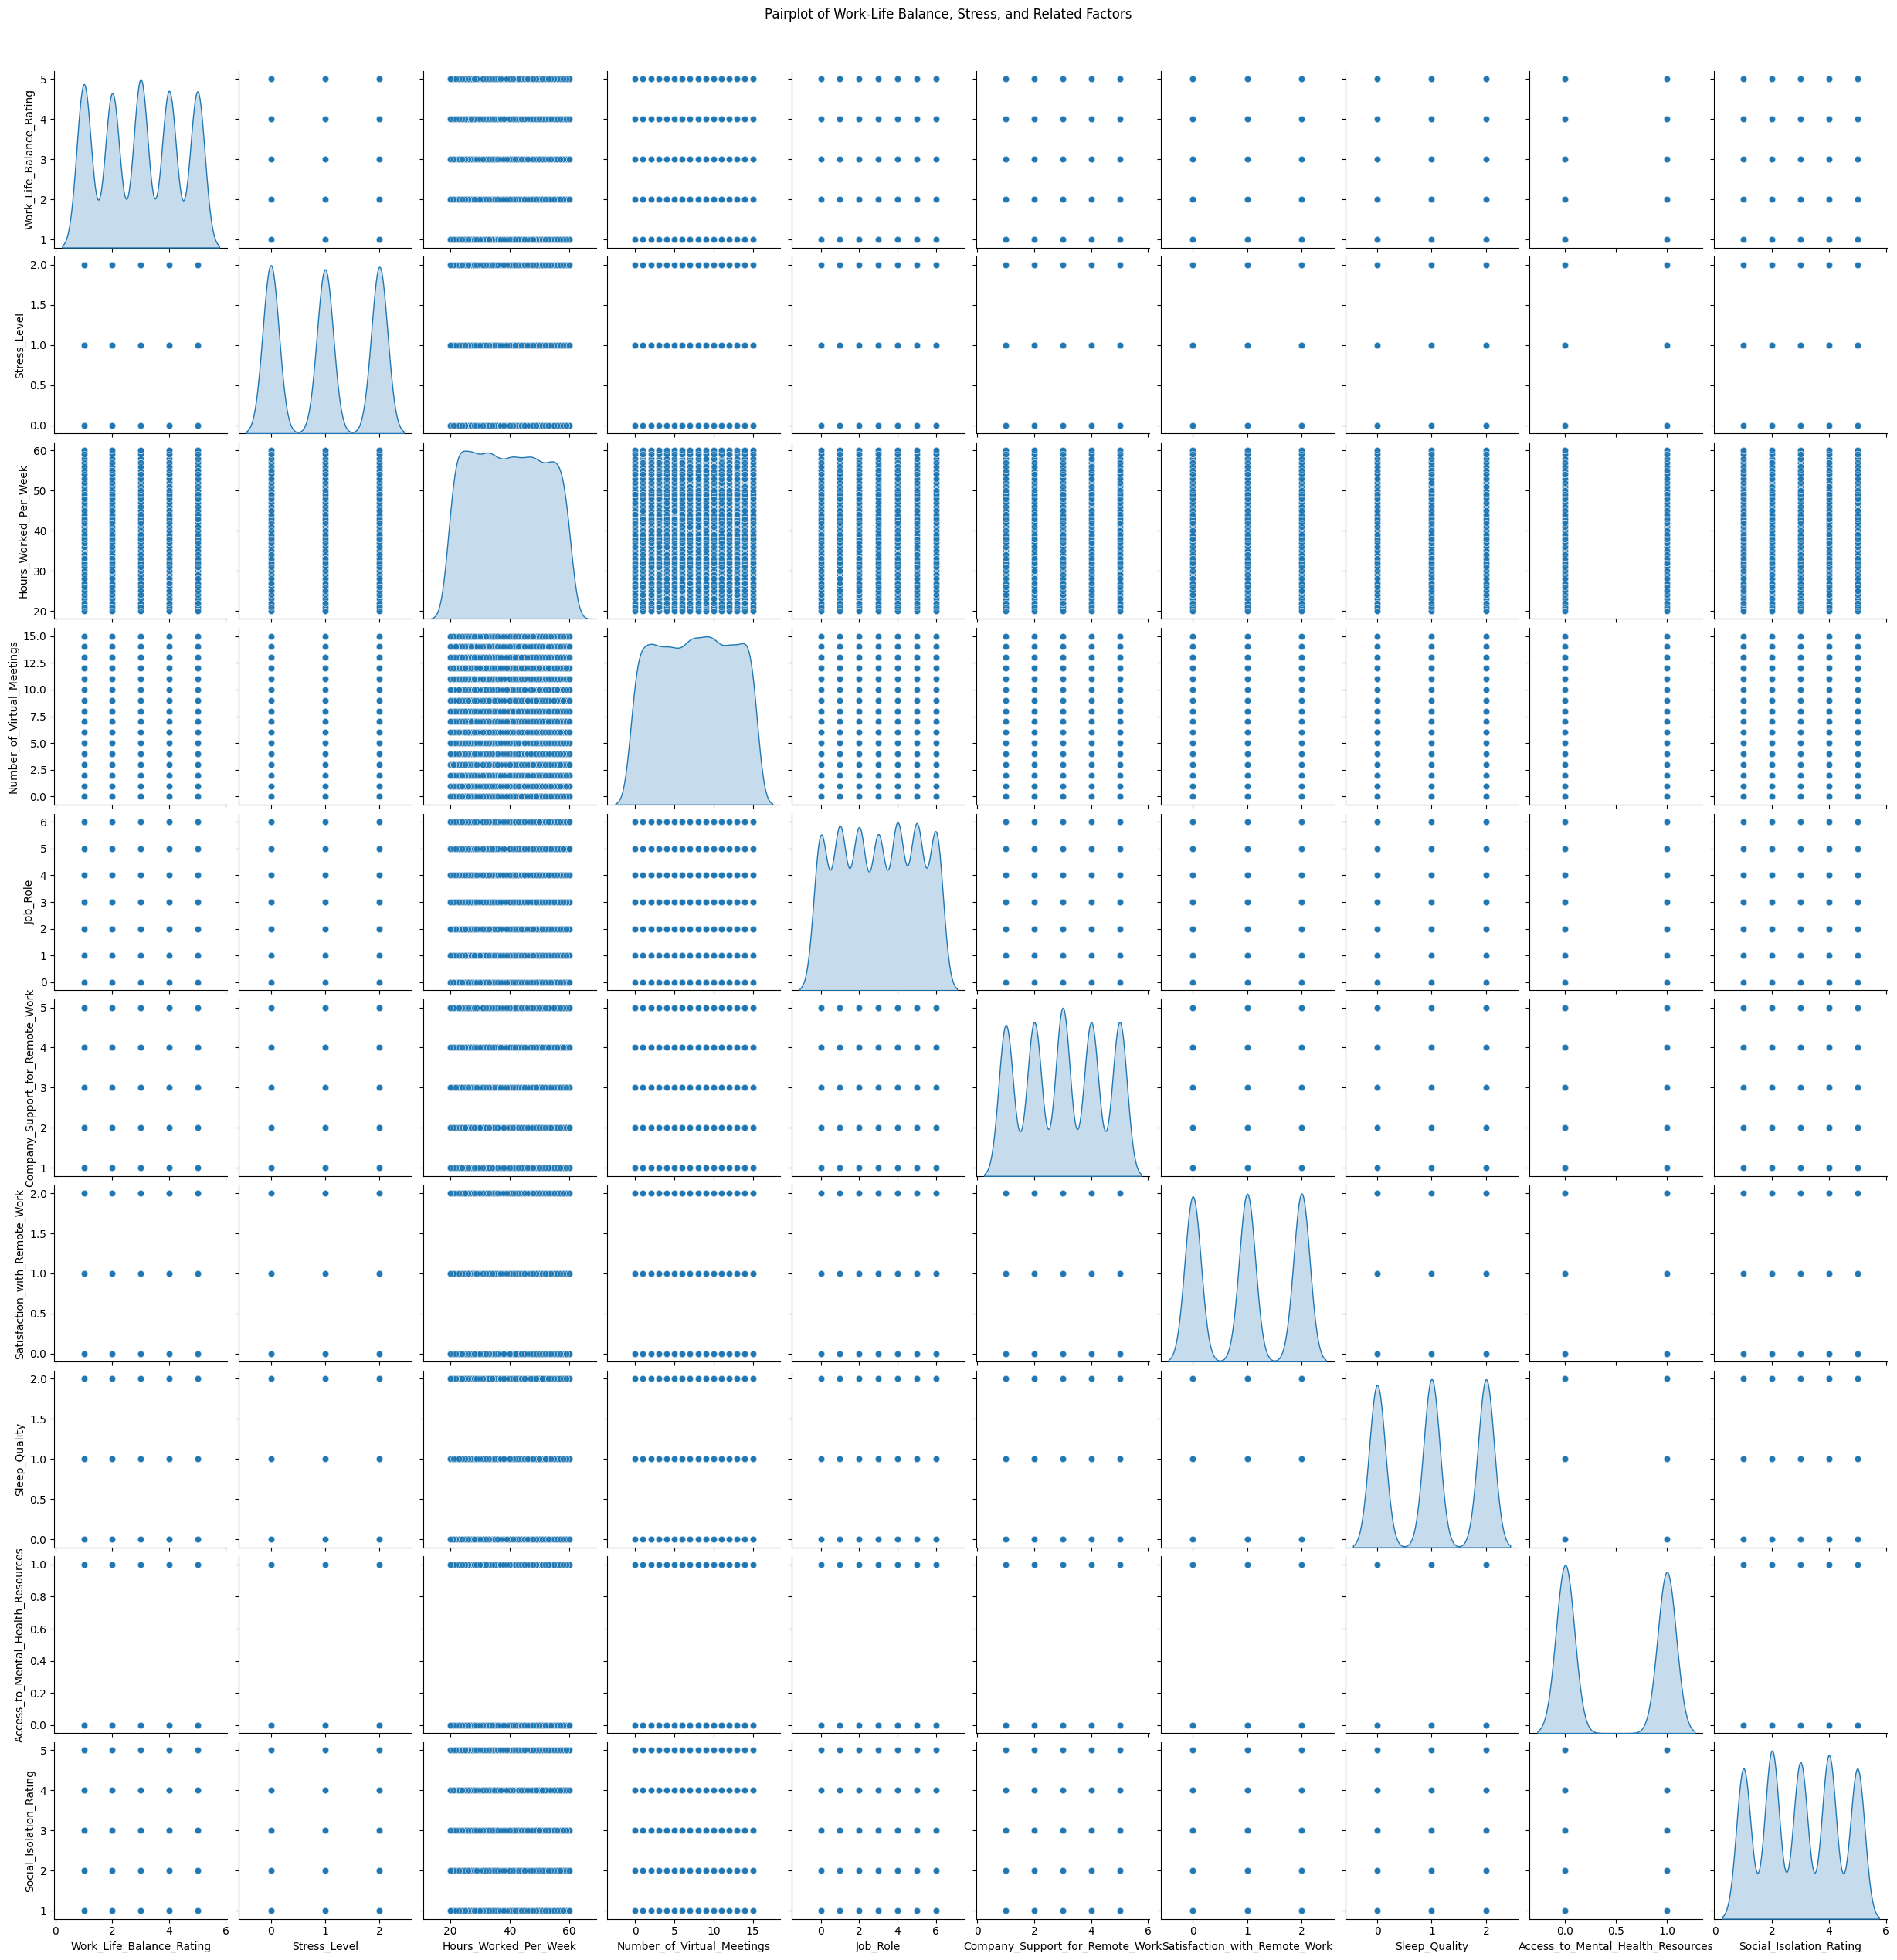

In [24]:
# Pairplot untuk melihat interaksi antar variabel
sns.pairplot(df_selected, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Work-Life Balance, Stress, and Related Factors', y=1.02)
plt.show()

Menunjukkan hubungan antara berbagai faktor seperti kepuasan keseimbangan kerja-hidp/ *Work_Life_Balance_Rating*, tingkat stres/ *Stress_Level*, kualitas tidur/ *Sleep_Quality*, dan dukungan perusahaan/ *Company_Support_for_Remote_Work*. Setiap grafik pada diagonal memperlihatkan distribusi dari masing-masing variabel, sementara grafik lainnya menunjukkan korelasi antar variabel. Beberapa variabel tampak memiliki pola distribusi tertentu, sedangkan variabel lain menunjukkan titik yang tersebar atau terkluster, mengindikasikan bahwa beberapa faktor mungkin bersifat kategorik atau diskrit. Pola tertentu, misalnya antara *Work_Life_Balance_Rating* dan *Stress_Level*, mungkin menunjukkan bahwa terdapat korelasi yang berlawanan arah, di mana peningkatan satu variabel berkaitan dengan penurunan yang lain.

<ipython-input-25-8927c0107f66>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Job_Role', y='Work_Life_Balance_Rating', data=df_selected, ci=None)


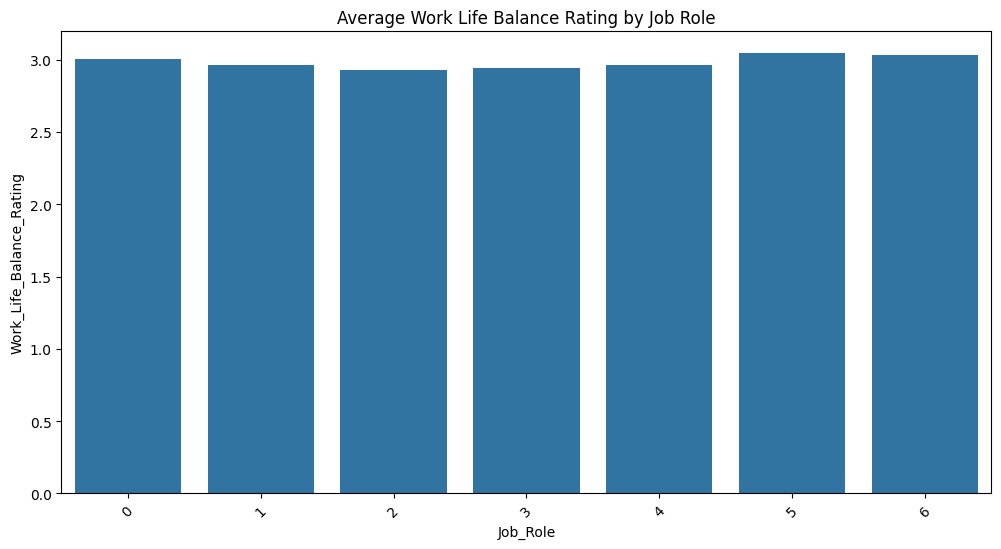

<ipython-input-25-8927c0107f66>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Access_to_Mental_Health_Resources', y='Stress_Level', data=df_selected, ci=None)


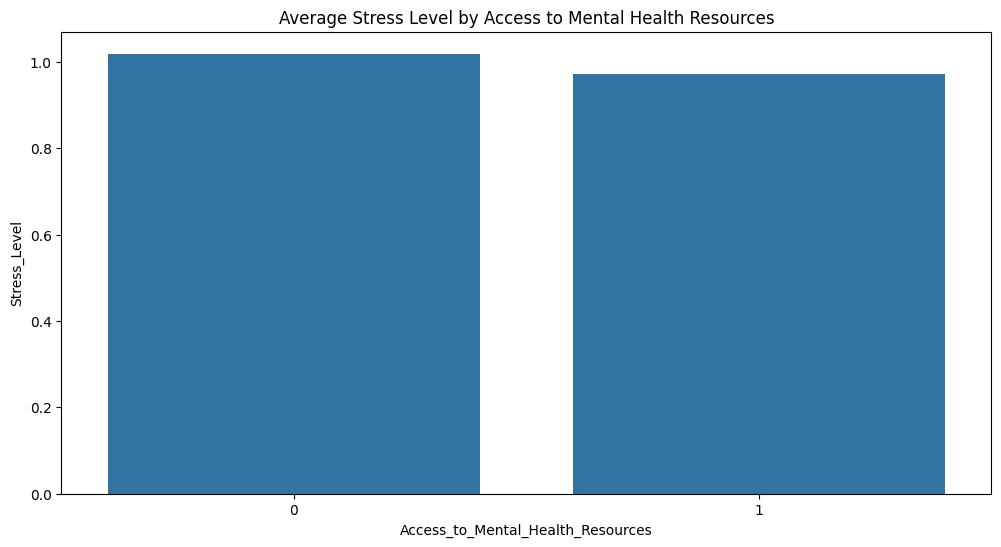

<ipython-input-25-8927c0107f66>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company_Support_for_Remote_Work', y='Satisfaction_with_Remote_Work', data=df_selected, ci=None)


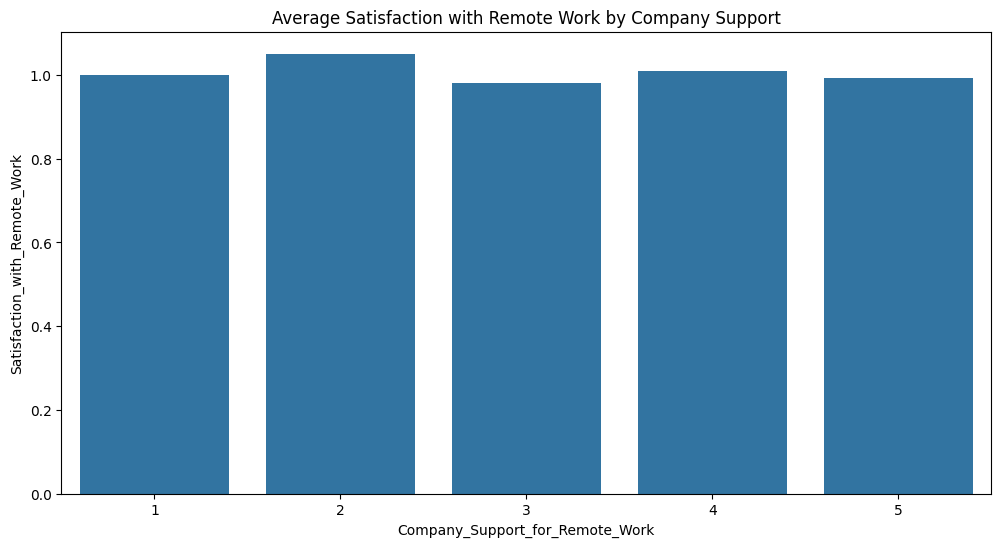

In [25]:
# Bar plot untuk Work-Life Balance Rating berdasarkan variabel kategorikal
plt.figure(figsize=(12, 6))
sns.barplot(x='Job_Role', y='Work_Life_Balance_Rating', data=df_selected, ci=None)
plt.title('Average Work Life Balance Rating by Job Role')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Access_to_Mental_Health_Resources', y='Stress_Level', data=df_selected, ci=None)
plt.title('Average Stress Level by Access to Mental Health Resources')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Company_Support_for_Remote_Work', y='Satisfaction_with_Remote_Work', data=df_selected, ci=None)
plt.title('Average Satisfaction with Remote Work by Company Support')
plt.show()

Bar Plot 1 (Penilaian Work-Life Balance/ *Work_Life_Balance_Rating* Berdasarkan Peran Pekerjaan/ *Job_Role*): Grafik menunjukkan bahwa semua peran pekerjaan memiliki tingkat work-life balance yang mirip, tanpa perbedaan signifikan antar peran. Ini menunjukkan bahwa peran pekerjaan mungkin bukan faktor utama yang memengaruhi work-life balance.

Bar Plot 2 (Tingkat Stres/ *Stress_Level* Berdasarkan Akses ke Sumber Daya Kesehatan Mental/ *Mental_Health_Resources*): Grafik menunjukkan bahwa akses ke sumber daya kesehatan mental hanya sedikit memengaruhi tingkat stres. Individu dengan akses ke sumber daya ini cenderung memiliki tingkat stres yang sedikit lebih rendah dibandingkan yang tidak memiliki akses.

Bar Plot 3 (Kepuasan Kerja Jarak Jauh/ *Statisfaction_With_Remote_Work* Berdasarkan Dukungan Perusahaan/ *Company_Support*): Grafik ini memperlihatkan bahwa tingkat kepuasan kerja jarak jauh relatif stabil di seluruh tingkat dukungan perusahaan, dengan kepuasan sedikit lebih tinggi pada kategori dukungan perusahaan tingkat 2.

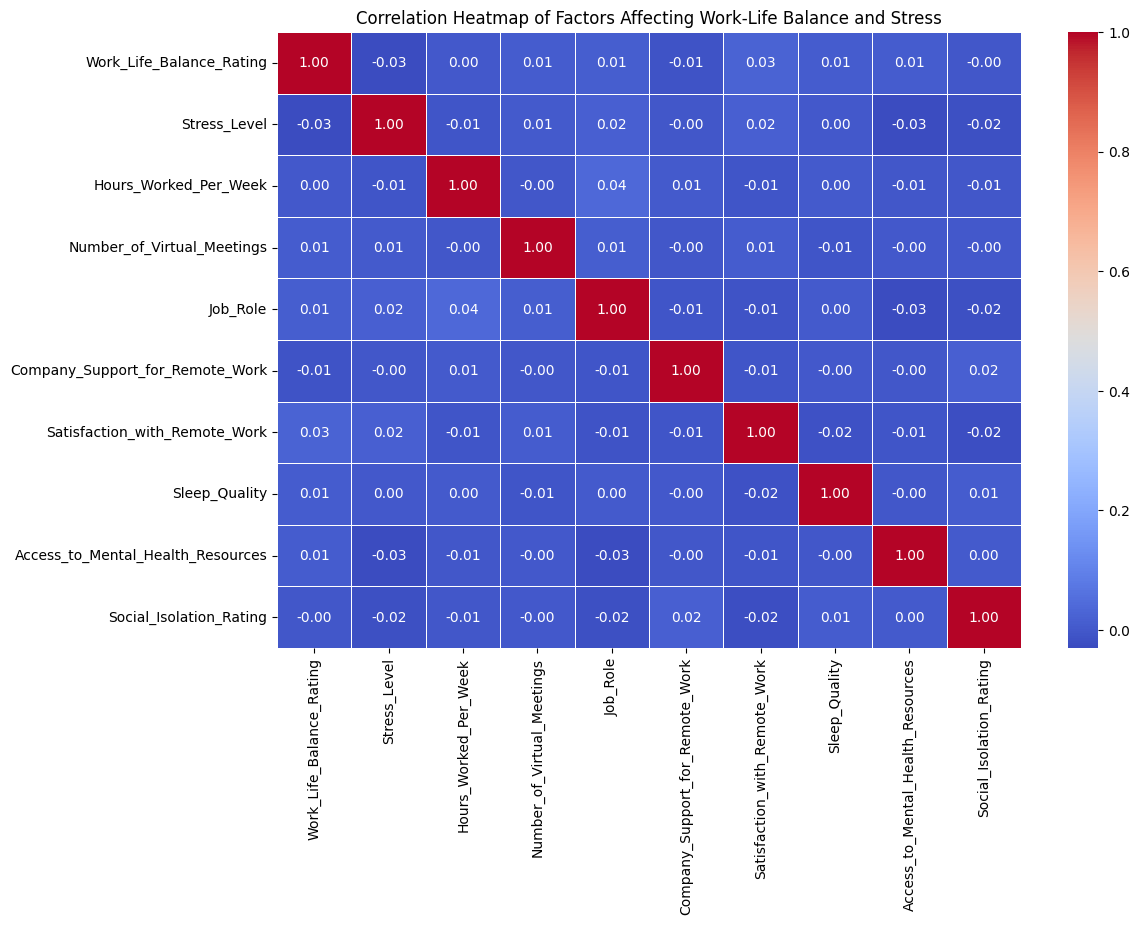

In [26]:
# Heatmap untuk Matriks Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors Affecting Work-Life Balance and Stress')
plt.show()

Menunjukkan korelasi dari berbagai faktor yang memengaruhi work-life balance dan tingkat stres. Hasilnya menunjukkan bahwa tidak ada korelasi yang kuat antara faktor-faktor ini, sehingga setiap faktor memiliki pengaruh yang terbatas dalam meningkatkan atau mengurangi *Work_Life_Balance* maupun *Stress_Level* secara signifikan.

# KESIMPULAN

Prosess Analisis ini menyajikan wawasan tentang faktor-faktor yang memengaruhi keseimbangan kerja-hidup/ *Work_Life_Balance*. Setelah melalui proses pembersihan data, termasuk penanganan *missing values* dan penghapusan *outlier*, analisis korelasi mengidentifikasi hubungan antar variabel seperti *Work_Life_Balance_Rating*, *Stress_Level*, dan *Hours_Worked_per_Week*. Model regresi linear yang dibuat menunjukkan bahwa variabel seperti jumlah jam kerja per minggu/  *Hours_Worked_per_Week*, tingkat isolasi sosial/ *Social_Isolation_Rating*, tingkat stres/ *Stress_Level*, dan dukungan perusahaan terhadap kerja jarak jauh/ *Company_Support_for_Remote_Work* berperan penting dalam memengaruhi keseimbangan kerja-hidup/ *Work_Life_Balance*. Visualisasi seperti *pairplot*, *bar plot*, dan *heatmap* memperlihatkan distribusi dan interaksi antar variabel, serta perbedaan rata-rata *Work_Life_Balance* berdasarkan peran pekerjaan/ *Job_Role* atau akses ke sumber daya kesehatan mental/ *Access_to_Mental_Health_Resources*. Hasil analisis ini menyimpulkan bahwa *Work_Life_Balance* dapat dipengaruhi oleh faktor lingkungan kerja dan dukungan kerja yang tersedia.